## CS109 HW0


Text(0,0.5,u'Y axis')

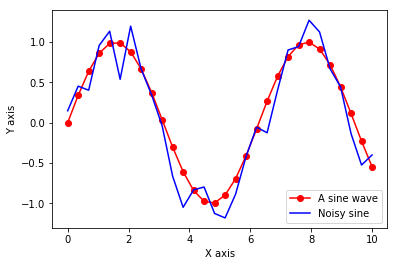

In [1]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
##practice 

x=np.linspace(0,10,30)
y=np.sin(x)
z = y + np.random.normal(size=30) * .2
plt.plot(x,y,'ro-',label='A sine wave')
plt.plot(x,z,'b',label='Noisy sine')
plt.legend(loc='lower right')
plt.xlabel('X axis')
plt.ylabel('Y axis')

In [2]:
x=np.random.random((3,4))
print x

[[0.55041049 0.24795318 0.30833832 0.50961199]
 [0.13080688 0.43618175 0.34064664 0.42932874]
 [0.42815088 0.7613256  0.25506434 0.17319203]]


In [3]:
print "first row"
print x[0,::]

first row
[0.55041049 0.24795318 0.30833832 0.50961199]


In [4]:
print " first row's every second element"
print x[0,::2]

 first row's every second element
[0.55041049 0.30833832]


In [5]:
print "Max element" 
print x.max()
print " Min element" 
print x.min()
print "Average of the array" 
print x.mean()

Max element
0.7613255978512629
 Min element
0.13080687747472863
Average of the array
0.38091756880887145


In [6]:
print "Max element rowise:" 
print x.max(axis=-1)
print "Max element columnwise:"
print x.max(axis=0)

Max element rowise:
[0.55041049 0.43618175 0.7613256 ]
Max element columnwise:
[0.55041049 0.7613256  0.34064664 0.50961199]


In [7]:
x=np.random.binomial(500,0.5)
print " number of heads:",x

 number of heads: 260


In [8]:
simulations=[]
for i in range(500):
    x=np.random.binomial(500,0.5)
    simulations.append(x)

In [9]:
simulations

[223,
 246,
 257,
 263,
 256,
 248,
 232,
 250,
 265,
 262,
 249,
 271,
 244,
 255,
 261,
 251,
 263,
 254,
 252,
 252,
 254,
 236,
 238,
 247,
 253,
 248,
 252,
 270,
 243,
 263,
 257,
 257,
 230,
 226,
 238,
 259,
 256,
 244,
 242,
 268,
 254,
 241,
 251,
 254,
 251,
 251,
 237,
 257,
 263,
 258,
 237,
 254,
 254,
 248,
 244,
 257,
 277,
 262,
 255,
 234,
 240,
 278,
 227,
 235,
 281,
 271,
 242,
 231,
 253,
 268,
 260,
 229,
 255,
 234,
 263,
 242,
 252,
 258,
 250,
 283,
 275,
 233,
 259,
 233,
 254,
 257,
 238,
 238,
 260,
 236,
 243,
 245,
 238,
 238,
 260,
 244,
 249,
 260,
 235,
 246,
 242,
 253,
 236,
 243,
 262,
 255,
 250,
 247,
 262,
 229,
 263,
 259,
 246,
 260,
 231,
 232,
 230,
 252,
 272,
 256,
 265,
 230,
 236,
 237,
 245,
 244,
 257,
 260,
 254,
 256,
 250,
 252,
 274,
 265,
 245,
 241,
 244,
 243,
 273,
 263,
 267,
 254,
 253,
 260,
 252,
 244,
 235,
 246,
 266,
 251,
 247,
 239,
 269,
 244,
 257,
 260,
 239,
 230,
 249,
 245,
 254,
 248,
 258,
 261,
 269,
 255,
 252

(array([  7.,  32.,  60.,  82.,  93., 100.,  73.,  29.,  13.,  11.]),
 array([221. , 227.2, 233.4, 239.6, 245.8, 252. , 258.2, 264.4, 270.6,
        276.8, 283. ]),
 <a list of 10 Patch objects>)

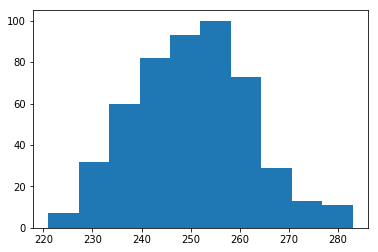

In [10]:
plt.hist(simulations)

## Monty Hall Problem Simulaton

In [11]:
def simulate_prizedoor(nsim):
    return np.random.randint(0, 3, (nsim))

In [12]:
##Considering that the participant always guesses a one 
def simulate_guess(nsim):
    return np.ones(nsim, dtype=np.int)

In [13]:
def goat_door(prizedoors, guesses):
    result = np.random.randint(0, 3, prizedoors.size)
    while True:
        bad = (result == prizedoors) | (result == guesses)
        if not bad.any():
            return result
        result[bad] = np.random.randint(0, 3, bad.sum())


In [14]:
def switch_guess(guesses, goatdoors):
    result = np.zeros(guesses.size)
    switch = {(0, 1): 2, (0, 2): 1, (1, 0): 2, (1, 2): 0, (2, 0): 1, (2, 1): 0}
    for i in [0, 1, 2]:
        for j in [0, 1, 2]:
            mask = (guesses == i) & (goatdoors == j)
            if not mask.any():
                continue
            result = np.where(mask, np.ones_like(result) * switch[(i, j)], result)
    return result

In [15]:
def win_percentage(guesses, prizedoors):
    return 100 * (guesses == prizedoors).mean()

In [16]:
nsim = 10000

#keeping guesses
print "Win percentage when keeping original door"
print win_percentage(simulate_prizedoor(nsim), simulate_guess(nsim))

#switching
pd = simulate_prizedoor(nsim)
guess = simulate_guess(nsim)
goats = goat_door(pd, guess)
guess = switch_guess(guess, goats)
print "Win percentage when switching doors"
print win_percentage(pd, guess)

Win percentage when keeping original door
33.6
Win percentage when switching doors
67.36
